In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime

1) Log file is loaded

In [2]:
file = open("log.txt", "r") 
lines = file.readlines()
for l in range(3): print(lines[l][:-1])

156.15.13.173 [01/Jan/2018:11:13:49 +0100] "GET AddProduct.html HTTP/1.0" 200 2356
176.247.135.49 [01/Jan/2018:11:18:07 +0100] "GET Shop.html HTTP/1.0" 200 7466
176.247.135.49 [01/Jan/2018:11:19:05 +0100] "GET AddProduct.html HTTP/1.0" 200 2356


2) Cass "Request" parses and keeps data of a single requests. Complete the TODO, where a given "line" (string) should be parsed in order to dervie the ip of the host making the request, time of the request (in seconds), and target page (name).

In [3]:
class Request:
    def __init__(self, line):
        # TODO DO PARSING HERE
        splitted_line = line.split(" ");
        self.ip = splitted_line[0];
        # convert hours + minutes + seconds -> total number of seconds
        hours = int(splitted_line[1].split(":")[1])
        minutes = int(splitted_line[1].split(":")[2])
        seconds = int(splitted_line[1].split(":")[3])
        self.time = hours * 60 *60 + minutes * 60 + seconds
        self.page = splitted_line[4]
        
    def __repr__(self):
        return self.ip + "     " +  str(datetime.timedelta(seconds=self.time)) + " -> " + self.page


3) Each line of log.txt is parsed and the Request objects are added to the list

In [4]:
reqs = [Request(line) for line in lines]
for l in range(10): print(reqs[l]) 

156.15.13.173     11:13:49 -> AddProduct.html
176.247.135.49     11:18:07 -> Shop.html
176.247.135.49     11:19:05 -> AddProduct.html
176.247.135.49     11:29:05 -> Summary.html
69.84.30.199     11:43:59 -> Shop.html
69.84.30.199     11:45:16 -> AddProduct.html
57.116.45.120     11:46:45 -> AddProduct.html
69.84.30.199     11:50:36 -> Summary.html
69.84.30.199     11:52:38 -> Payment.html
26.19.183.202     11:53:11 -> AddProduct.html


# Exercise

Your task is to analyze the log file. You should indentify the users and sessions. Then, compute the following: <br>
3.1) the number of sessions (should be 1000 :) ), <br>
3.2) the number of users, <br>
3.3) the average number of sessions per one user <br>
3.4) use the distribution plot to visualize the sessions' lengths (minutes);  <br>
3.5) use the distribution plot to visualize the sessions' lengths (the number of requests) <br>
3.6) use the distribution plot to visualize sessions' starting times (hours). <br>
3.7) which web page is the most common entry point?; for each page plot the number of times it has been an entry page,  <br>
3.8) which web page is the most common departure point?; for each page plot the number of times the user stopped a session while being on this page, <br>
3.9) for each page plot the average time the user stayed on this page <br>
3.10) print the fist 10 sessions (paths). <br>

You may find the following classes helpful and data.

In [7]:
class Session:
    def __init__(self):
        self.startTime = 0
        self.stopTime = 0
        self.requests = []
        
    def __repr__(self):
        print("SESSION")
        print(self.startTime)
        print(self.stopTime)
        STR = ""
        for r in self.requests:
            print(r)
            STR += ("  " + r.page + "    " + str(datetime.timedelta(seconds=r.time)) + "\n")
        return STR

class Computer:
    def __init__(self):
        self.ip = []
        self.sessions = []
    def __repr__(self):
        return self.ip

PAGES = ["Shop.html", "AddProduct.html", "Summary.html", "Payment.html","About.html", "Contact.html"]
pagetonumb={x:i for i, x in enumerate(PAGES)}
LINKS = [[1, 4],
         [2,4],
         [3],
         [],
         [1,5],
         []]

#plot distribution
#count, bins, ignored = plt.hist(data, 50, alpha=0.5, normed=True)
#plt.plot()

#x_axis = np.arange(len(pages))
#plt.bar(x_axis, data, align='center', alpha=0.5)
#plt.xticks(y_pos, pages, rotation=90)

In [30]:
currdic = {}
sesslist=[]
hardthet = 2400
hardgamm = 900
def appendor(req, numb):
        currdic[req.ip]={"Start":req.time, "End":req.time, "Pages":{pagetonumb[req.page]}, "Attainable":set(LINKS[pagetonumb[req.page]]), 
                              "Requests":1, "Pathway":[req.page], "Number":[numb]}
        sesslist.append([req.ip, currdic[req.ip]])
        

def addReq(req, numb):
        if (req.ip not in currdic):
            appendor(req, numb)
        elif(currdic[req.ip]["Start"]<req.time-hardthet or
             currdic[req.ip]["End"]<req.time-hardgamm or
             pagetonumb[req.page] not in currdic[req.ip]["Attainable"]
            ):
            appendor(req, numb)
        else:
            currdic[req.ip]["End"]=req.time
            currdic[req.ip]["Attainable"]|=set(LINKS[pagetonumb[req.page]])
            currdic[req.ip]["Pages"]|={pagetonumb[req.page]}
            currdic[req.ip]["Requests"]+=1
            currdic[req.ip]["Pathway"].append(req.page)
            currdic[req.ip]["Number"].append(numb)
            
def counter(lst):
    dic={}
    for x in lst:
        dic[x]=1 if x not in dic else dic[x]+1
    return dic

ls=[Request(l) for l in lines]
for i, l in enumerate(ls):
    addReq(l, i)
users={l.ip for l in ls}

print(f'Number of sessions: {len(sesslist)}')
print(f'Number of users: {len(users)}')
print(f'Average sessions per user: {len(sesslist)/len(users)}')

Number of sessions: 1000
Number of users: 391
Average sessions per user: 2.557544757033248


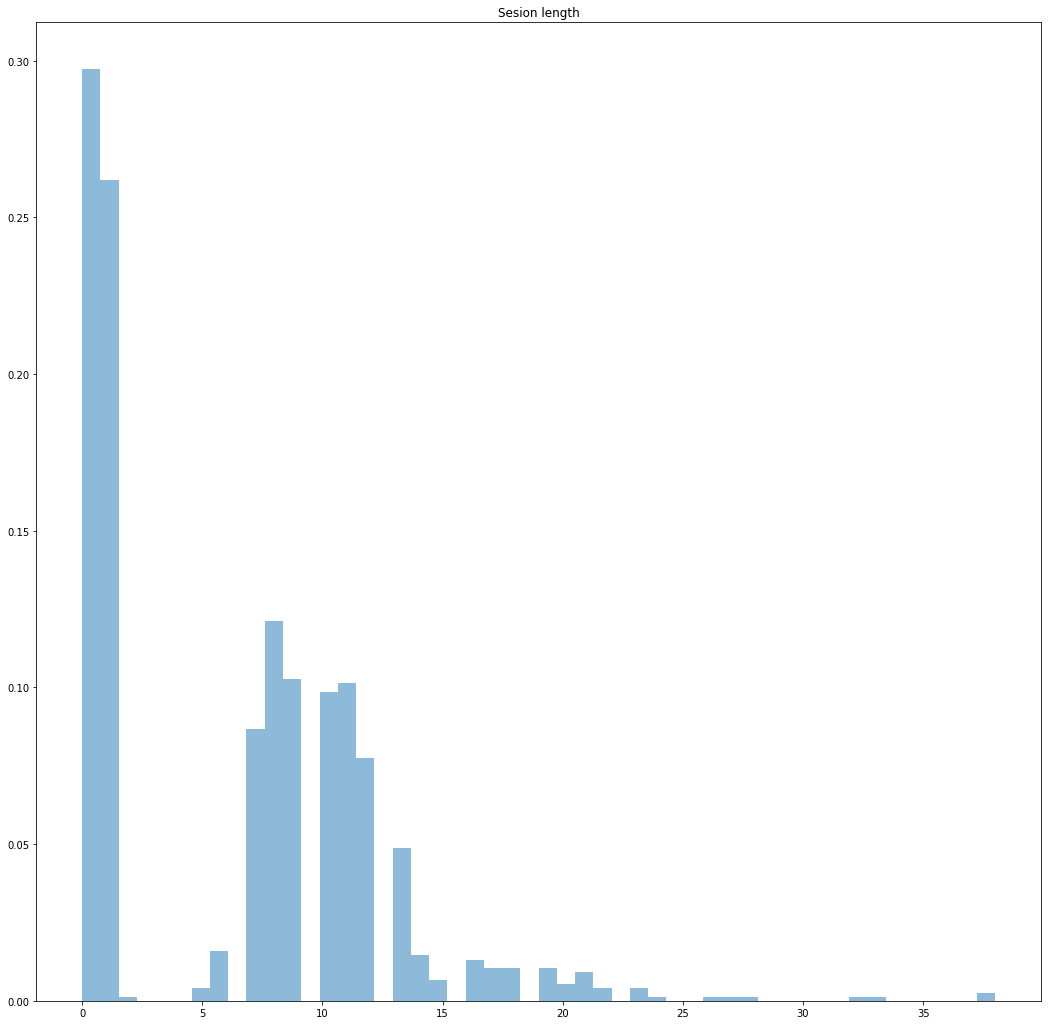

In [32]:
fig, ax=plt.subplots(1, 1, figsize=(18, 18))
ax.set_title('Sesion length')
ax.hist([(x[1]["End"]-x[1]["Start"])//60 for x in sesslist], 50, alpha=0.5, density=True)
plt.show()

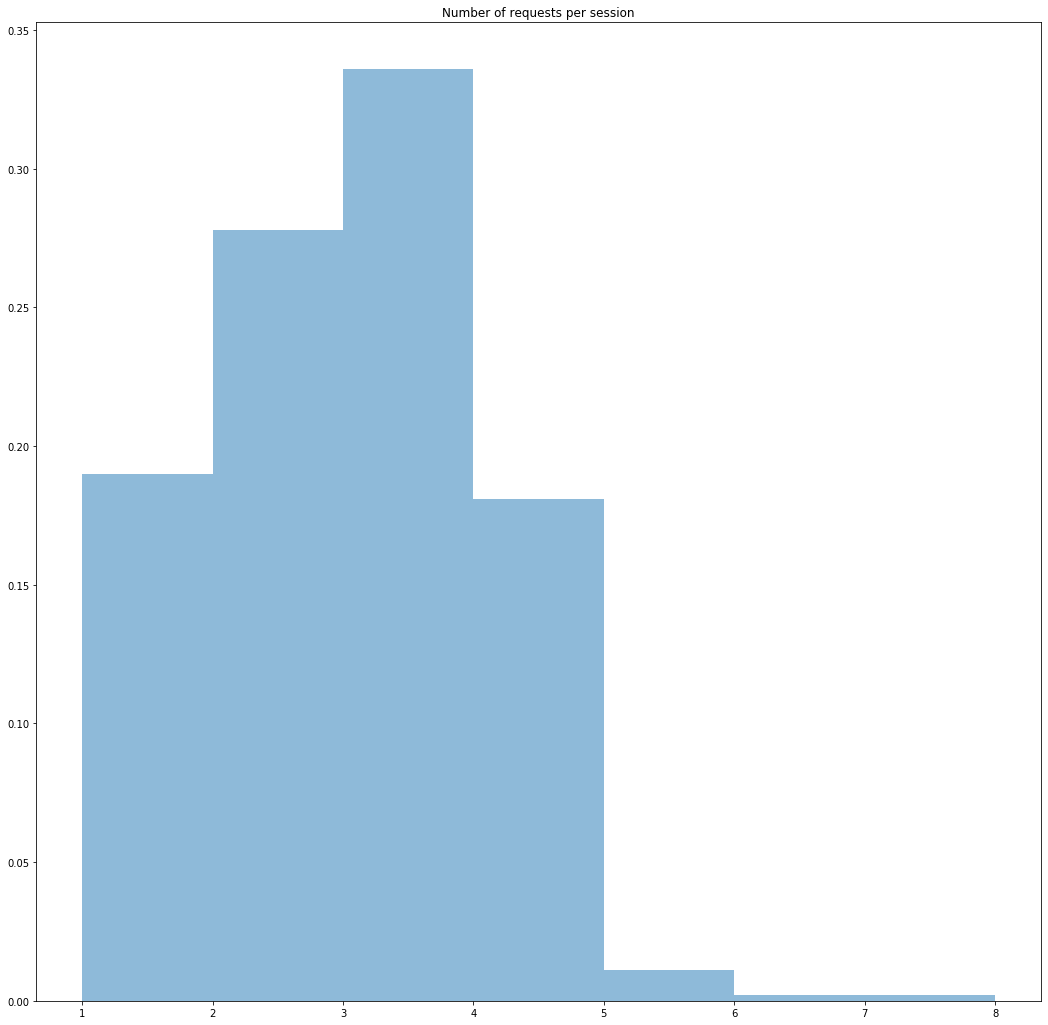

In [12]:
fig, ax=plt.subplots(1, 1, figsize=(18, 18))
ax.set_title('Number of requests per session')
lst=[x[1]["Requests"] for x in sesslist]
dic=counter(lst)
ax.hist(lst, range(1, max(dic.keys())+2), alpha=0.5, density=True, align='mid')
plt.show()

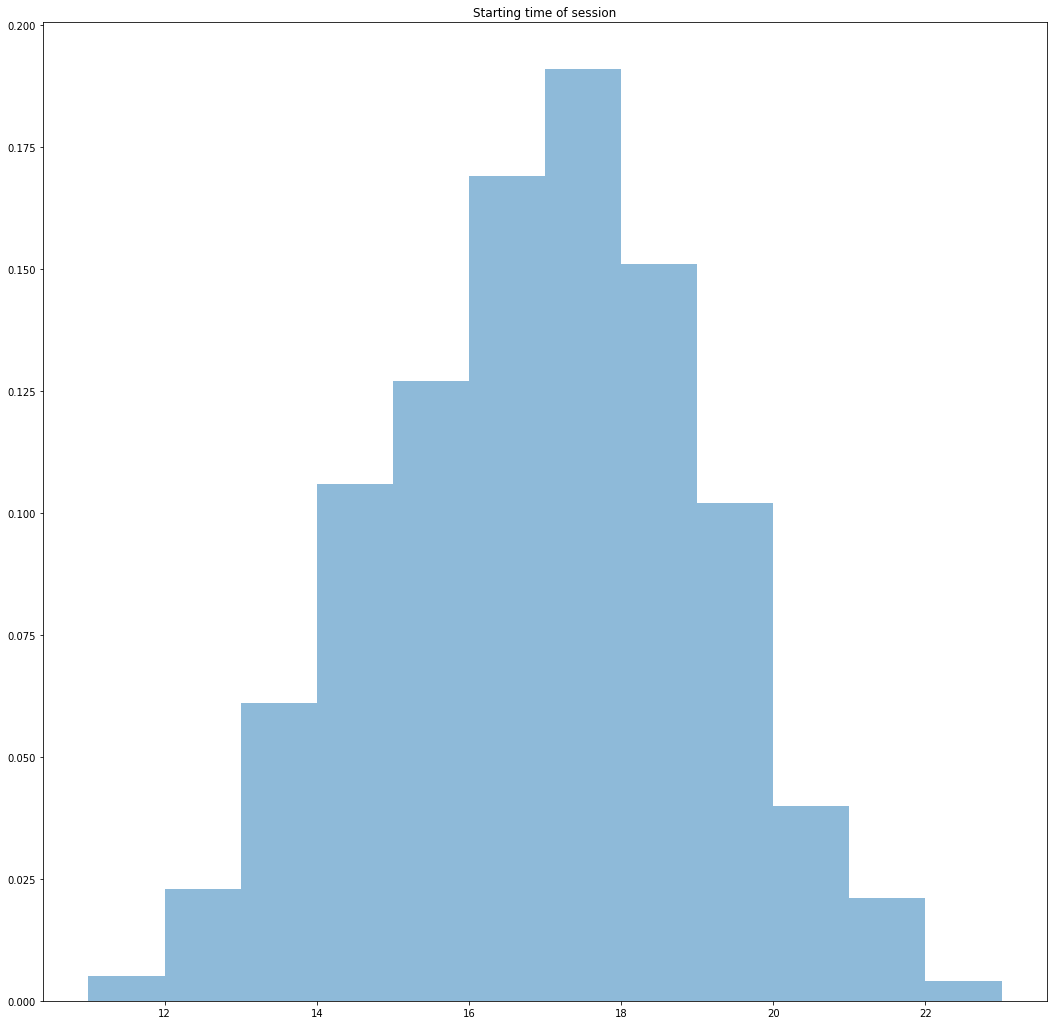

In [15]:
fig, ax=plt.subplots(1, 1, figsize=(18, 18))
ax.set_title('Starting time of session')
lst=[x[1]["Start"]//3600 for x in sesslist]
dic=counter(lst)
ax.hist(lst, bins=range(min(dic.keys()), max(dic.keys())+2), alpha=0.5, density=True)
plt.show()

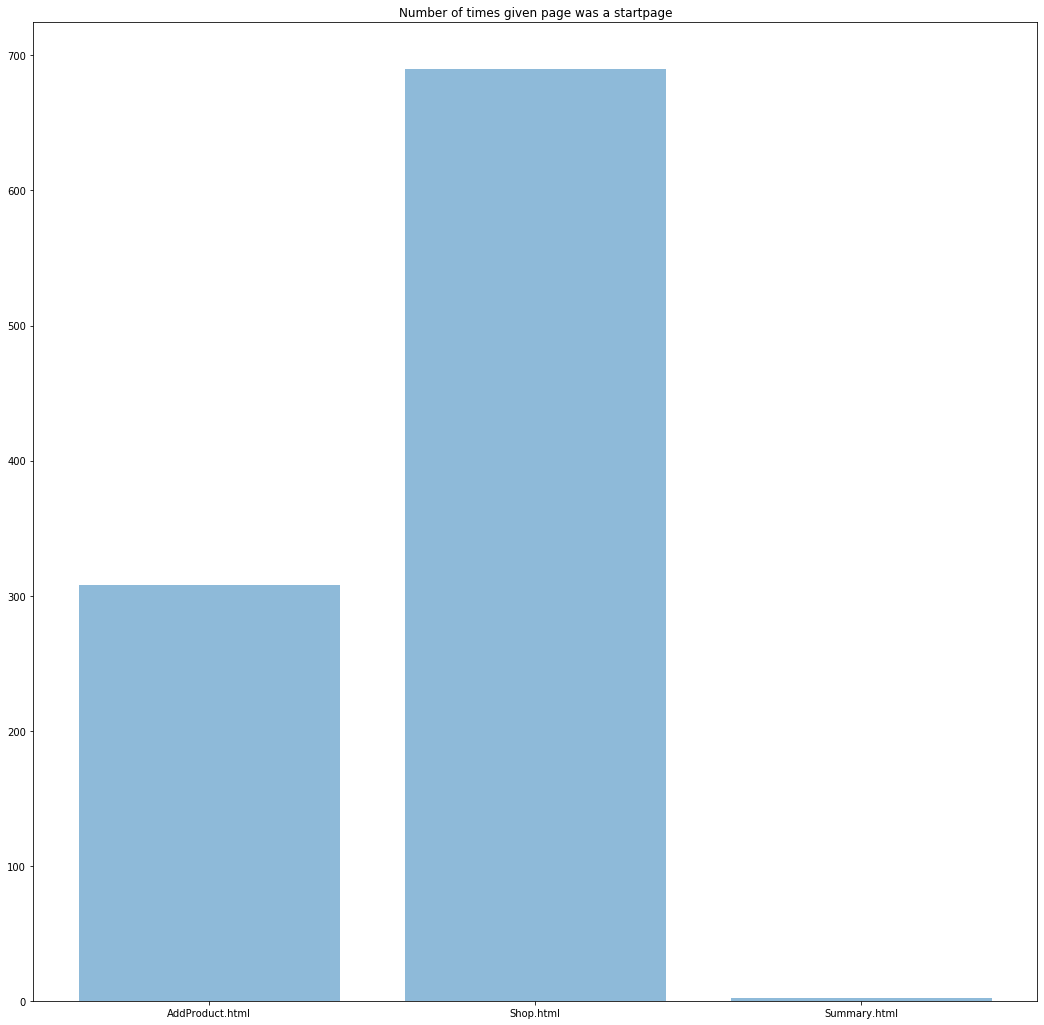

In [17]:
fig, ax=plt.subplots(1, 1, figsize=(18, 18))
ax.set_title('Number of times given page was a starting page')
lst=[x[1]["Pathway"][0] for x in sesslist]
dic=counter(lst)
ax.bar(dic.keys(), dic.values(), alpha=0.5)
plt.show()

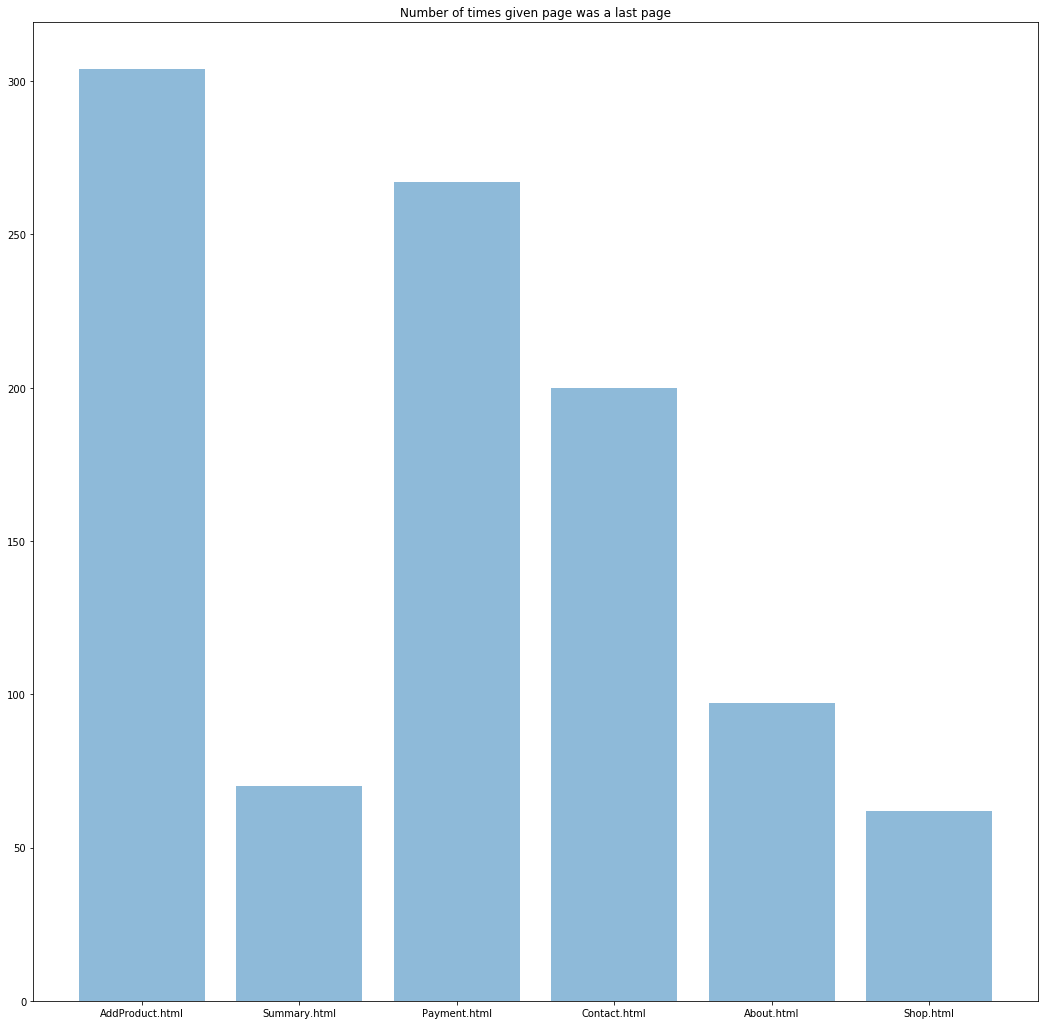

In [35]:
fig, ax=plt.subplots(1, 1, figsize=(18, 18))
ax.set_title('Number of times given page was a last page')
lst=[x[1]["Pathway"][len(x[1]["Pathway"])-1] for x in sesslist]
dic=counter(lst)
ax.bar(dic.keys(), dic.values(), alpha=0.5)
plt.show()

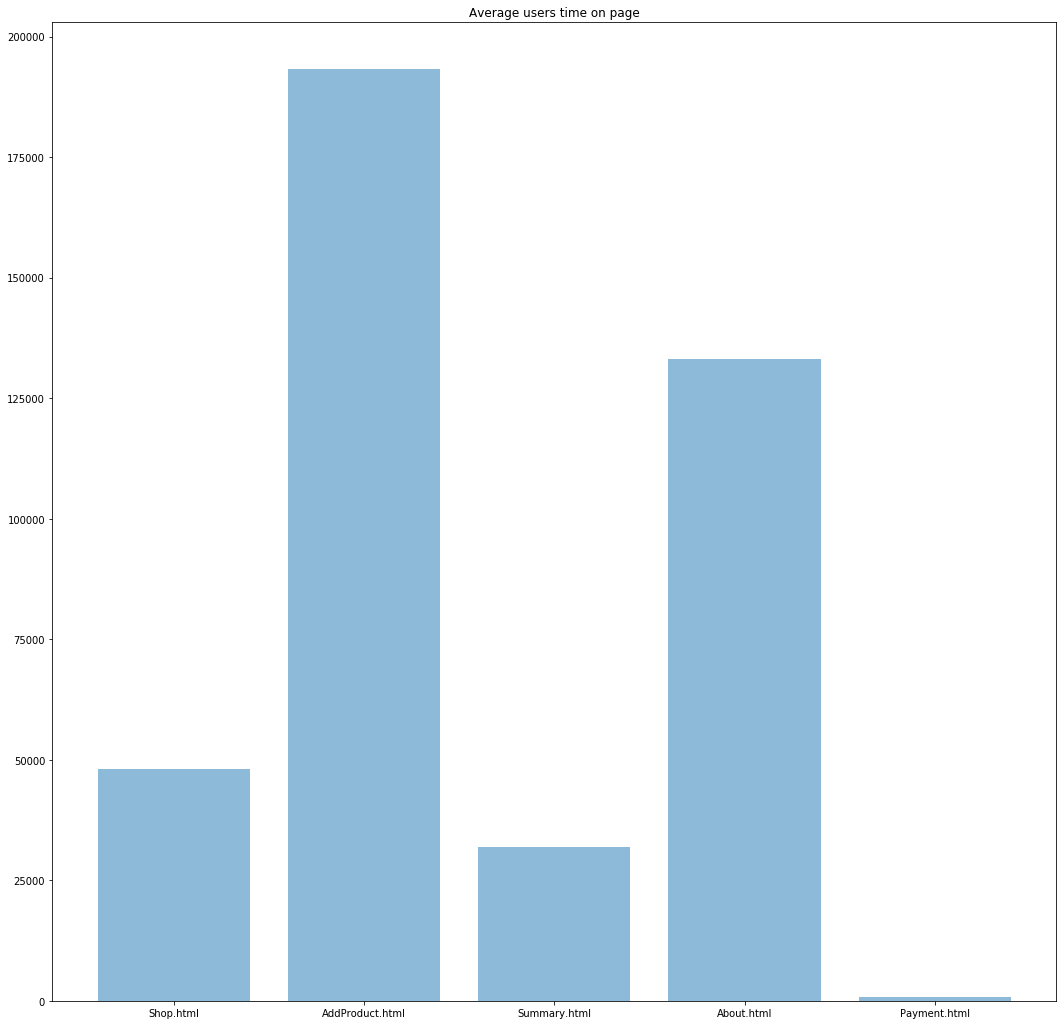

In [34]:
fig, ax=plt.subplots(1, 1, figsize=(18, 18))
ax.set_title('Average users time on page')

dic={}
for x in sesslist:
    for j in range(len(x[1]["Number"])-1):
        tm=ls[x[1]["Number"][j+1]].time-ls[x[1]["Number"][j]].time
        if ls[x[1]["Number"][j]].page not in dic:
            dic[ls[x[1]["Number"][j]].page]=tm
        else:
            dic[ls[x[1]["Number"][j]].page]+=tm
            
ax.bar(dic.keys(), dic.values(), alpha=0.5)
plt.show()

In [33]:
_=[print(x[1]["Pathway"]) for x in sesslist[:10]]

['AddProduct.html']
['Shop.html', 'AddProduct.html', 'Summary.html']
['Shop.html', 'AddProduct.html', 'Summary.html', 'Payment.html']
['AddProduct.html', 'Summary.html', 'Payment.html']
['AddProduct.html', 'About.html', 'Contact.html']
['Shop.html', 'AddProduct.html']
['Shop.html', 'About.html']
['Shop.html', 'About.html', 'Contact.html']
['Shop.html']
['AddProduct.html']
